In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, cohen_kappa_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from deepforest import CascadeForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

/home/biofarmaka/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Collections

In [2]:
# load all data
all_data = joblib.load("dataset/feats_res.pkl")

In [3]:
len(all_data)

20

In [4]:
tmp = pd.DataFrame(all_data[0][0])
tmp

,0,1,2,3,4,5,6,7,8,9,...,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.040404,0.046832,0.022957,0.040404,0.085399,0.062443,0.081726,0.011938,0.043159,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.038184,0.061920,0.034056,0.061920,0.077399,0.056760,0.058824,0.018576,0.037152,0.0
2,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.040123,0.077778,0.038889,0.053086,0.086420,0.045679,0.055556,0.020370,0.022840,0.0
3,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.059908,0.050691,0.032258,0.055300,0.055300,0.082949,0.055300,0.036866,0.027650,1.0
4,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.034783,0.052174,0.046377,0.043478,0.078261,0.047826,0.069565,0.002899,0.023188,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.032468,0.095238,0.043290,0.051948,0.095238,0.067100,0.041126,0.002165,0.025974,1.0
9996,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.047664,0.047664,0.041121,0.045794,0.060748,0.037383,0.068224,0.015888,0.034579,0.0
9997,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.049137,0.049137,0.033201,0.083665,0.111554,0.062417,0.049137,0.005312,0.026560,1.0
9998,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.031652,0.069238,0.084075,0.046489,0.092977,0.047478,0.057369,0.003956,0.014837,0.0


In [5]:
tmp.iloc[:,:tmp.shape[1]-1]

,0,1,2,3,4,5,6,7,8,9,...,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.023875,0.040404,0.046832,0.022957,0.040404,0.085399,0.062443,0.081726,0.011938,0.043159
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.012384,0.038184,0.061920,0.034056,0.061920,0.077399,0.056760,0.058824,0.018576,0.037152
2,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.025309,0.040123,0.077778,0.038889,0.053086,0.086420,0.045679,0.055556,0.020370,0.022840
3,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.013825,0.059908,0.050691,0.032258,0.055300,0.055300,0.082949,0.055300,0.036866,0.027650
4,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.027536,0.034783,0.052174,0.046377,0.043478,0.078261,0.047826,0.069565,0.002899,0.023188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.030303,0.032468,0.095238,0.043290,0.051948,0.095238,0.067100,0.041126,0.002165,0.025974
9996,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.028037,0.047664,0.047664,0.041121,0.045794,0.060748,0.037383,0.068224,0.015888,0.034579
9997,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.023904,0.049137,0.049137,0.033201,0.083665,0.111554,0.062417,0.049137,0.005312,0.026560
9998,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.022750,0.031652,0.069238,0.084075,0.046489,0.092977,0.047478,0.057369,0.003956,0.014837


In [6]:
comp_feats = ["ecfp_res", "morgan_res", "maccs_res", "pubchem_res", "klekota_res"]
prot_feats = ["aac_res", "aaindex1_res", "paac_res", "atc_res"]

combinations = list(itertools.product(comp_feats, prot_feats))
combinations

[('ecfp_res', 'aac_res'),
 ('ecfp_res', 'aaindex1_res'),
 ('ecfp_res', 'paac_res'),
 ('ecfp_res', 'atc_res'),
 ('morgan_res', 'aac_res'),
 ('morgan_res', 'aaindex1_res'),
 ('morgan_res', 'paac_res'),
 ('morgan_res', 'atc_res'),
 ('maccs_res', 'aac_res'),
 ('maccs_res', 'aaindex1_res'),
 ('maccs_res', 'paac_res'),
 ('maccs_res', 'atc_res'),
 ('pubchem_res', 'aac_res'),
 ('pubchem_res', 'aaindex1_res'),
 ('pubchem_res', 'paac_res'),
 ('pubchem_res', 'atc_res'),
 ('klekota_res', 'aac_res'),
 ('klekota_res', 'aaindex1_res'),
 ('klekota_res', 'paac_res'),
 ('klekota_res', 'atc_res')]

In [8]:
def main(all_data, combinations):
    
    all_metrics = {}
    
    i=0
    j=0
    
    for comb in tqdm(all_data, desc="combinations"):
        
        samples_metrics = {}
        
        name = combinations[i][0].replace("_res", "")+"_"+combinations[i][1].replace("_res", "")
        i = i+1
        
        print("working on: ", name)
        
        for sample in tqdm(comb, desc="samples", leave=False):

            samples = f"sample_{j}"
            j = j+1
                        
            # data split
            tmp = pd.DataFrame(sample)            
            X = tmp.iloc[:,:tmp.shape[1]-1]
            y = tmp.iloc[:,tmp.shape[1]-1]            
            x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)
            
            y_test.to_csv(f"roc/y_test_{samples}.csv", index=False)
            joblib.dump(y_test, f"results/y_test_{samples}.pkl")
            
            # initialize models
            cdf = CascadeForestClassifier(verbose=0)
            rf = RandomForestClassifier()
            xgb = XGBClassifier()
            lgbm = LGBMClassifier()
            nn = MLPClassifier()
            lr = LogisticRegression()
            knn = KNeighborsClassifier()
            
            # train models
            cdf.fit(x_train, y_train)
            rf.fit(x_train, y_train)
            xgb.fit(x_train, y_train)
            lgbm.fit(x_train, y_train)
            nn.fit(x_train, y_train)
            lr.fit(x_train, y_train)
            knn.fit(x_train, y_train)
            
            # evaluate models
            cdf_pred = cdf.predict(x_test)
            cdf_proba = cdf.predict_proba(x_test)
            pd.DataFrame(cdf_pred).to_csv(f"roc/cdf_{name}_{samples}_pred.csv", index=False)
            pd.DataFrame(cdf_proba).to_csv(f"roc/cdf_{name}_{samples}_proba.csv", index=False)
#             joblib.dump(cdf_pred, f"results/cdf_{name}_{samples}_pred.pkl")
#             joblib.dump(cdf_proba, f"results/cdf_{name}_{samples}_proba.pkl")
            
            rf_pred = rf.predict(x_test)
            rf_proba = rf.predict_proba(x_test)
            pd.DataFrame(rf_pred).to_csv(f"roc/rf_{name}_{samples}_pred.csv", index=False)
            pd.DataFrame(rf_proba).to_csv(f"roc/rf_{name}_{samples}_proba.csv", index=False)
#             joblib.dump(rf_pred, f"results/rf_{name}_{samples}_pred.pkl")
#             joblib.dump(rf_proba, f"results/rf_{name}_{samples}_proba.pkl")

            xgb_pred = xgb.predict(x_test)
            xgb_proba = xgb.predict_proba(x_test)
            pd.DataFrame(xgb_pred).to_csv(f"roc/xgb_{name}_{samples}_pred.csv", index=False)
            pd.DataFrame(xgb_proba).to_csv(f"roc/xgb_{name}_{samples}_proba.csv", index=False)
#             joblib.dump(xgb_pred, f"results/xgb_{name}_{samples}_pred.pkl")
#             joblib.dump(xgb_proba, f"results/xgb_{name}_{samples}_proba.pkl")

            lgbm_pred = lgbm.predict(x_test)
            lgbm_proba = lgbm.predict_proba(x_test)
            pd.DataFrame(lgbm_pred).to_csv(f"roc/lgbm_{name}_{samples}_pred.csv", index=False)
            pd.DataFrame(lgbm_proba).to_csv(f"roc/lgbm_{name}_{samples}_proba.csv", index=False)
#             joblib.dump(lgbm_pred, f"results/lgbm_{name}_{samples}_pred.pkl")
#             joblib.dump(lgbm_proba, f"results/lgbm_{name}_{samples}_proba.pkl")

            nn_pred = nn.predict(x_test)
            nn_proba = nn.predict_proba(x_test)
            pd.DataFrame(nn_pred).to_csv(f"roc/nn_{name}_{samples}_pred.csv", index=False)
            pd.DataFrame(nn_proba).to_csv(f"roc/nn_{name}_{samples}_proba.csv", index=False)
#             joblib.dump(nn_pred, f"results/nn_{name}_{samples}_pred.pkl")
#             joblib.dump(nn_proba, f"results/nn_{name}_{samples}_proba.pkl")

            lr_pred = lr.predict(x_test)
            lr_proba = lr.predict_proba(x_test)
            pd.DataFrame(lr_pred).to_csv(f"roc/lr_{name}_{samples}_pred.csv", index=False)
            pd.DataFrame(lr_proba).to_csv(f"roc/lr_{name}_{samples}_proba.csv", index=False)
#             joblib.dump(lr_pred, f"results/lr_{name}_{samples}_pred.pkl")
#             joblib.dump(lr_proba, f"results/lr_{name}_{samples}_proba.pkl")

            knn_pred = knn.predict(x_test)
            knn_proba = knn.predict_proba(x_test)
            pd.DataFrame(knn_pred).to_csv(f"roc/knn_{name}_{samples}_pred.csv", index=False)
            pd.DataFrame(knn_proba).to_csv(f"roc/knn_{name}_{samples}_proba.csv", index=False)
#             joblib.dump(knn_pred, f"results/knn_{name}_{samples}_pred.pkl")
#             joblib.dump(knn_proba, f"results/knn_{name}_{samples}_proba.pkl")
            
            # calculate metrics
            cdf_acc = accuracy_score(y_test, cdf_pred)
            rf_acc = accuracy_score(y_test, rf_pred)
            xgb_acc = accuracy_score(y_test, xgb_pred)
            lgbm_acc = accuracy_score(y_test, lgbm_pred)
            nn_acc = accuracy_score(y_test, nn_pred)
            lr_acc = accuracy_score(y_test, lr_pred)
            knn_acc = accuracy_score(y_test, knn_pred)
            
            cdf_f1 = f1_score(y_test, cdf_pred)
            rf_f1 = f1_score(y_test, rf_pred)
            xgb_f1 = f1_score(y_test, xgb_pred)
            lgbm_f1 = f1_score(y_test, lgbm_pred)
            nn_f1 = f1_score(y_test, nn_pred)
            lr_f1 = f1_score(y_test, lr_pred)
            knn_f1 = f1_score(y_test, knn_pred)

            cdf_roc_auc = roc_auc_score(y_test, cdf_proba[:,1])
            rf_roc_auc = roc_auc_score(y_test, rf_proba[:,1])
            xgb_roc_auc = roc_auc_score(y_test, xgb_proba[:,1])
            lgbm_roc_auc = roc_auc_score(y_test, lgbm_proba[:,1])
            nn_roc_auc = roc_auc_score(y_test, nn_proba[:,1])
            lr_roc_auc = roc_auc_score(y_test, lr_proba[:,1])
            knn_roc_auc = roc_auc_score(y_test, knn_proba[:,1])

            cdf_precision = precision_score(y_test, cdf_pred)
            rf_precision = precision_score(y_test, rf_pred)
            xgb_precision = precision_score(y_test, xgb_pred)
            lgbm_precision = precision_score(y_test, lgbm_pred)
            nn_precision = precision_score(y_test, nn_pred)
            lr_precision = precision_score(y_test, lr_pred)
            knn_precision = precision_score(y_test, knn_pred)

            cdf_recall = recall_score(y_test, cdf_pred)
            rf_recall = recall_score(y_test, rf_pred)
            xgb_recall = recall_score(y_test, xgb_pred)
            lgbm_recall = recall_score(y_test, lgbm_pred)
            nn_recall = recall_score(y_test, nn_pred)
            lr_recall = recall_score(y_test, lr_pred)
            knn_recall = recall_score(y_test, knn_pred)

            cdf_cohen_kappa = cohen_kappa_score(y_test, cdf_pred)
            rf_cohen_kappa = cohen_kappa_score(y_test, rf_pred)
            xgb_cohen_kappa = cohen_kappa_score(y_test, xgb_pred)
            lgbm_cohen_kappa = cohen_kappa_score(y_test, lgbm_pred)
            nn_cohen_kappa = cohen_kappa_score(y_test, nn_pred)
            lr_cohen_kappa = cohen_kappa_score(y_test, lr_pred)
            knn_cohen_kappa = cohen_kappa_score(y_test, knn_pred)
        
            # store to list
            acc = [cdf_acc,rf_acc,xgb_acc,lgbm_acc,nn_acc,lr_acc,knn_acc]
            f1 = [cdf_f1,rf_f1,xgb_f1,lgbm_f1,nn_f1,lr_f1,knn_f1]
            roc_auc = [cdf_roc_auc,rf_roc_auc,xgb_roc_auc,lgbm_roc_auc,nn_roc_auc,lr_roc_auc,knn_roc_auc]
            precision = [cdf_precision,rf_precision,xgb_precision,lgbm_precision,nn_precision,lr_precision,knn_precision]
            recall = [cdf_recall,rf_recall,xgb_recall,lgbm_recall,nn_recall,lr_recall,knn_recall]
            cohen_kappa = [cdf_cohen_kappa,rf_cohen_kappa,xgb_cohen_kappa,lgbm_cohen_kappa,nn_cohen_kappa,lr_cohen_kappa,knn_cohen_kappa]
            
            # store to dict
            samples_metrics.update({
                samples: [acc, f1, roc_auc, precision, recall, cohen_kappa]
            })

        print("RESULTS OF ", name.upper())
        print(samples_metrics)
        print("=====================================================")
        
        all_metrics.update({
            name: samples_metrics
        })
        
    return all_metrics

In [9]:
all_metrics = main(all_data, combinations)

combinations:   0%|          | 0/20 [00:00<?, ?it/s]

working on:  ecfp_aac


samples:   0%|          | 0/10 [00:00<?, ?it/s]

RESULTS OF  ECFP_AAC
{'sample_0': [[0.8484848484848485, 0.8409090909090909, 0.7915151515151515, 0.7648484848484849, 0.5081818181818182, 0.49575757575757573, 0.5151515151515151], [0.830393487109905, 0.8222146969183881, 0.7843260188087774, 0.7508028259473346, 0.5136350014983518, 0.4730842305256492, 0.4959042218021424], [0.9143223630330557, 0.9090994174498787, 0.8658003619379011, 0.8397415317673873, 0.5020921202198694, 0.49762030059012574, 0.513670124604165], [0.9033210332103321, 0.8926470588235295, 0.7833437695679399, 0.7685733070348455, 0.4913990825688073, 0.4773162939297125, 0.49778621125869704], [0.768361581920904, 0.7620841180163214, 0.7853107344632768, 0.7338355304456999, 0.5379786566227244, 0.4689265536723164, 0.49403640929064657], [0.6950864568491897, 0.6798744997172917, 0.5825671020074066, 0.5284233229361062, 0.018295673748413566, -0.010282762160759962, 0.02890015217576014]], 'sample_1': [[0.8621212121212121, 0.8536363636363636, 0.7890909090909091, 0.7706060606060606, 0.495151515

samples:   0%|          | 0/10 [00:00<?, ?it/s]

RESULTS OF  ECFP_AAINDEX1
{'sample_10': [[0.8651515151515151, 0.843939393939394, 0.7866666666666666, 0.7854545454545454, 0.7712121212121212, 0.5133333333333333, 0.7575757575757576], [0.8528925619834711, 0.8356208107245452, 0.7791718946047678, 0.7730769230769231, 0.7689011325374963, 0.4936948297604036, 0.7754070746771478], [0.9384657760537736, 0.9182046820981218, 0.8672334771597032, 0.8667999018847469, 0.845094292509224, 0.502225612861777, 0.8510768222573054], [0.9008379888268156, 0.85, 0.7786833855799373, 0.7897838899803536, 0.7502986857825568, 0.49588347055098164, 0.7013712544438802], [0.8097928436911488, 0.8217200251098556, 0.7796610169491526, 0.7570621468926554, 0.7884494664155681, 0.4915254237288136, 0.86691776522285], [0.7290664387762105, 0.6871583039727858, 0.5728414537952794, 0.5698012402186126, 0.542654049315165, 0.0252176513627419, 0.5183682315685543]], 'sample_11': [[0.8754545454545455, 0.8615151515151516, 0.8118181818181818, 0.7936363636363636, 0.7733333333333333, 0.48878787

samples:   0%|          | 0/10 [00:00<?, ?it/s]

RESULTS OF  ECFP_PAAC
{'sample_20': [[0.863030303030303, 0.8603030303030303, 0.7948484848484848, 0.7830303030303031, 0.7424242424242424, 0.49454545454545457, 0.7627272727272727], [0.8471940500338067, 0.8465890183028286, 0.7832212616074288, 0.768733850129199, 0.7403787416004886, 0.4718176060797973, 0.7791255289139634], [0.9299091919061535, 0.9217856314110026, 0.8686202560925785, 0.8591235233525701, 0.8125290751019306, 0.4944267741374372, 0.8516959265621304], [0.9179487179487179, 0.9008498583569405, 0.7993464052287582, 0.7917498336660014, 0.7209994051160024, 0.476038338658147, 0.7074795081967213], [0.7865662272441933, 0.7984934086629002, 0.7677338355304457, 0.7470182046453233, 0.7608286252354048, 0.46767106089139987, 0.86691776522285], [0.724416213549721, 0.7192068909763029, 0.5886635293077925, 0.5647209538557787, 0.48518261976524324, -0.012711326492877095, 0.5284361798348295]], 'sample_21': [[0.8736363636363637, 0.8666666666666667, 0.7948484848484848, 0.776969696969697, 0.73575757575757

samples:   0%|          | 0/10 [00:00<?, ?it/s]

/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classifica

RESULTS OF  ECFP_ATC
{'sample_30': [[0.8072727272727273, 0.7806060606060606, 0.7563636363636363, 0.7257575757575757, 0.5172727272727272, 0.5063636363636363, 0.7554545454545455], [0.7785515320334262, 0.7580213903743315, 0.7452471482889733, 0.7079703130041949, 0.0, 0.4564564564564565, 0.7733782645324349], [0.8723240333459471, 0.8473936389101264, 0.8348372401076619, 0.807890113858559, 0.4973279406718982, 0.5068739516874317, 0.8508032175036435], [0.874120406567631, 0.810578984989278, 0.7523992322456814, 0.7284196547144755, 0.0, 0.48717948717948717, 0.6996951219512195], [0.7018204645323289, 0.711864406779661, 0.7382297551789078, 0.6886377903327056, 0.0, 0.4293785310734463, 0.864406779661017], [0.6115280009684037, 0.5588940670033486, 0.5118380918631955, 0.44985653717433494, 0.0, 0.007616085491556457, 0.5141438488870791]], 'sample_31': [[0.8172727272727273, 0.7906060606060606, 0.7369696969696969, 0.7403030303030304, 0.48515151515151517, 0.5178787878787878, 0.7663636363636364], [0.792140641158

samples:   0%|          | 0/10 [00:00<?, ?it/s]

RESULTS OF  MORGAN_AAC
{'sample_40': [[0.8384848484848485, 0.8248484848484848, 0.7893939393939394, 0.7748484848484849, 0.5087878787878788, 0.5039393939393939, 0.5157575757575757], [0.8181508017741385, 0.8053872053872053, 0.7844961240310078, 0.7628471113948292, 0.5077436987549346, 0.4840844626536401, 0.5119120342089188], [0.903871691138479, 0.8913353346197169, 0.866502761238297, 0.848453673456404, 0.5070210510173574, 0.5149942024476593, 0.5095564918427906], [0.8961136023916293, 0.8685548293391431, 0.7751225490196079, 0.775974025974026, 0.49176470588235294, 0.4860759493670886, 0.49851279000594884], [0.7526679221594476, 0.7507846829880728, 0.7940991839296924, 0.7501569365976145, 0.5247959824231011, 0.4821092278719397, 0.5260514752040176], [0.6748457139307786, 0.647683231871867, 0.5786290811523461, 0.5486575142753007, 0.018603115196213382, 0.006422635929240639, 0.032143325158657365]], 'sample_41': [[0.8481818181818181, 0.833030303030303, 0.7951515151515152, 0.7830303030303031, 0.5054545454

samples:   0%|          | 0/10 [00:00<?, ?it/s]

RESULTS OF  MORGAN_AAINDEX1
{'sample_50': [[0.8636363636363636, 0.843939393939394, 0.7993939393939394, 0.7763636363636364, 0.759090909090909, 0.5024242424242424, 0.746969696969697], [0.8504983388704319, 0.8334949886841254, 0.7926065162907269, 0.7640664961636828, 0.7584320875113947, 0.47873015873015873, 0.7669550655874966], [0.9319001813366988, 0.9117435279052946, 0.876774339698689, 0.8622442356369455, 0.8320679113476468, 0.5104120583204713, 0.8497426313348786], [0.903316866619619, 0.8593333333333333, 0.791119449656035, 0.7785016286644951, 0.734982332155477, 0.4842646114322415, 0.6904522613065327], [0.8035153797865662, 0.8091650973006905, 0.7940991839296924, 0.7501569365976145, 0.783427495291902, 0.47332077840552417, 0.8625235404896422], [0.7259357770634267, 0.6868954844414967, 0.5983590191620585, 0.551647769008577, 0.5186655394248425, 0.002907037725245698, 0.49751630268283065]], 'sample_51': [[0.8736363636363637, 0.8542424242424242, 0.8048484848484848, 0.793939393939394, 0.753636363636

samples:   0%|          | 0/10 [00:00<?, ?it/s]

RESULTS OF  MORGAN_PAAC
{'sample_60': [[0.8539393939393939, 0.8515151515151516, 0.7875757575757576, 0.7778787878787878, 0.7257575757575757, 0.5145454545454545, 0.7536363636363637], [0.8367208672086721, 0.8371010638297873, 0.7799058084772371, 0.7673754363694065, 0.7366889729415188, 0.48389175257731953, 0.7718214987370196], [0.919579141462116, 0.9122276685749127, 0.8640660608380764, 0.858268140749052, 0.8083845514812719, 0.5179446472576457, 0.8483942821019465], [0.9087564385577631, 0.8897526501766785, 0.7801507537688442, 0.77599486521181, 0.6865509761388287, 0.49702183984116477, 0.6979695431472082], [0.7752667922159447, 0.7903327055869429, 0.7796610169491526, 0.7589453860640302, 0.7947269303201506, 0.4714375392341494, 0.8631512868801005], [0.7060881114803026, 0.7015619549629859, 0.5746349837488609, 0.5549002375926302, 0.4537339247969131, 0.026257129563832637, 0.5105518947437553]], 'sample_61': [[0.8618181818181818, 0.8596969696969697, 0.7927272727272727, 0.7678787878787878, 0.73878787878

samples:   0%|          | 0/10 [00:00<?, ?it/s]

/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classifica

RESULTS OF  MORGAN_ATC
{'sample_70': [[0.7803030303030303, 0.7436363636363637, 0.7503030303030302, 0.7445454545454545, 0.5172727272727272, 0.5078787878787879, 0.7424242424242424], [0.7449876890608512, 0.7231675392670158, 0.7407174323473883, 0.7295476419634264, 0.0, 0.46367239101717306, 0.7628348214285714], [0.8425834908215535, 0.8192623630551207, 0.8325040608608768, 0.8229003133583475, 0.49880923092425083, 0.514148381300586, 0.8478115848812781], [0.8472, 0.7552973342447027, 0.7425867507886436, 0.7460629921259843, 0.0, 0.489198606271777, 0.6865896534404822], [0.664783427495292, 0.6936597614563716, 0.738857501569366, 0.7137476459510358, 0.0, 0.4406779661016949, 0.8581293157564344], [0.5568952105789533, 0.48525743212821104, 0.499925518474177, 0.48773955757668164, 0.0, 0.01130709585295786, 0.4885002828292554]], 'sample_71': [[0.7681818181818182, 0.7627272727272727, 0.7390909090909091, 0.7333333333333333, 0.5157575757575757, 0.5178787878787878, 0.7618181818181818], [0.7362978283350569, 0.73

samples:   0%|          | 0/10 [00:00<?, ?it/s]

RESULTS OF  MACCS_AAC
{'sample_80': [[0.8254545454545454, 0.8190909090909091, 0.796969696969697, 0.7712121212121212, 0.5130303030303031, 0.5187878787878788, 0.5233333333333333], [0.8063214525891055, 0.8013311148086523, 0.7916666666666666, 0.762054837693035, 0.49796938456732265, 0.46459878624409984, 0.4976045991695944], [0.9000449020704598, 0.8985110238076588, 0.8765205933545671, 0.8570052930016391, 0.5189015283988128, 0.5118859936063276, 0.5271852432894205], [0.8682114409847936, 0.8526912181303116, 0.7843499691928527, 0.7651898734177215, 0.4956467661691542, 0.5018208302986161, 0.5065019505851756], [0.7526679221594476, 0.7558066541117389, 0.7991211550533585, 0.7589453860640302, 0.5003138731952291, 0.4325172630257376, 0.48901443816698054], [0.6489318907921084, 0.6363698783359063, 0.5937097224105747, 0.5417526512685258, 0.025203429572229874, 0.03196166860813732, 0.04442593762563907]], 'sample_81': [[0.8321212121212122, 0.8318181818181818, 0.7933333333333333, 0.7627272727272727, 0.50303030

samples:   0%|          | 0/10 [00:00<?, ?it/s]

RESULTS OF  MACCS_AAINDEX1
{'sample_90': [[0.8172727272727273, 0.8084848484848485, 0.8066666666666666, 0.7824242424242425, 0.7424242424242424, 0.5163636363636364, 0.7193939393939394], [0.8079006052883083, 0.8016321406151916, 0.8024767801857585, 0.7724968314321927, 0.7421116504854368, 0.45934959349593496, 0.7416294642857143], [0.8990519815934609, 0.8917253317181828, 0.8874258021786146, 0.8573362664939721, 0.8128184930335597, 0.5137839427106949, 0.8174456863305373], [0.8201811125485123, 0.8016321406151915, 0.7916921197312157, 0.7799104286628279, 0.7181444509688785, 0.4988962472406181, 0.6675037669512808], [0.7959824231010671, 0.8016321406151915, 0.8135593220338984, 0.7652228499686127, 0.7677338355304457, 0.4256120527306968, 0.8342749529190208], [0.633747973549017, 0.6165120468834984, 0.6132280631753215, 0.5640544153703662, 0.48541948493517384, 0.026797979092454183, 0.4427661904704595]], 'sample_91': [[0.8333333333333334, 0.8257575757575758, 0.806969696969697, 0.7703030303030303, 0.746969

samples:   0%|          | 0/10 [00:00<?, ?it/s]

RESULTS OF  MACCS_PAAC
{'sample_100': [[0.83, 0.8196969696969697, 0.8054545454545454, 0.7684848484848484, 0.723939393939394, 0.5160606060606061, 0.7248484848484849], [0.8166067342268715, 0.8080025814778962, 0.8002489110143125, 0.762289981331674, 0.7208090714066809, 0.45992560027054447, 0.7449438202247192], [0.9048210334389875, 0.8985685764204921, 0.8839448804100836, 0.8534611185212397, 0.7871680473777523, 0.5126806977362517, 0.819583958965171], [0.8519781718963165, 0.8313413014608234, 0.7933374460209747, 0.7557063541024059, 0.704191616766467, 0.49853372434017595, 0.6741230299949161], [0.7840552416823603, 0.7859384808537351, 0.8072818581293157, 0.7689893283113622, 0.7382297551789078, 0.4268675455116133, 0.832391713747646], [0.6586851385613338, 0.638303469191966, 0.6106727059625183, 0.5366883915192585, 0.44810988236330795, 0.02629075921274049, 0.4533252036347196]], 'sample_101': [[0.8366666666666667, 0.8318181818181818, 0.8066666666666666, 0.7706060606060606, 0.723030303030303, 0.5084848

samples:   0%|          | 0/10 [00:00<?, ?it/s]

/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classifica

RESULTS OF  MACCS_ATC
{'sample_110': [[0.8033333333333333, 0.7909090909090909, 0.7887878787878788, 0.7515151515151515, 0.5172727272727272, 0.5212121212121212, 0.7251515151515151], [0.7778158165011982, 0.7683008730691738, 0.7841436977392381, 0.7375160051216388, 0.0, 0.11434977578475337, 0.7464355605255799], [0.8767581587723972, 0.8628870597087213, 0.8707991649171041, 0.8316828788515661, 0.49881842463237125, 0.5047123270341722, 0.8206734133774337], [0.8554216867469879, 0.8259927797833935, 0.773838630806846, 0.752449379490529, 0.0, 0.5340314136125655, 0.672883064516129], [0.7131198995605775, 0.7181418706842435, 0.7947269303201506, 0.7231638418079096, 0.0, 0.064030131826742, 0.8380414312617702], [0.6039969735361923, 0.5794850769835949, 0.577451903257594, 0.5017890303002854, 0.0, 0.012251940544159345, 0.45412027847142733]], 'sample_111': [[0.8057575757575758, 0.7981818181818182, 0.7766666666666666, 0.7539393939393939, 0.5178787878787878, 0.5178787878787878, 0.7242424242424242], [0.781004441

samples:   0%|          | 0/10 [00:00<?, ?it/s]

RESULTS OF  PUBCHEM_AAC
{'sample_120': [[0.8184848484848485, 0.8151515151515152, 0.7918181818181819, 0.7666666666666667, 0.5081818181818182, 0.5027272727272727, 0.506969696969697], [0.7939456484348125, 0.7966666666666665, 0.788550323176362, 0.7602739726027398, 0.4796409105482526, 0.47555129434324067, 0.48431061806656106], [0.8969970039543977, 0.8884922723205765, 0.8782719947514958, 0.8527059473362333, 0.5019656147961332, 0.5001338603902324, 0.5069406980083854], [0.878234398782344, 0.8493248045486852, 0.7735507246376812, 0.7541692402717727, 0.49017038007863695, 0.484375, 0.48911651728553135], [0.7244193345888261, 0.7501569365976145, 0.8041431261770244, 0.7664783427495292, 0.46955430006277465, 0.4670433145009416, 0.4795982423101067], [0.6343977911833771, 0.6284125407167928, 0.5836886605980076, 0.5330302532442543, 0.013803328531150849, 0.0030751081921146506, 0.012119298586486638]], 'sample_121': [[0.8257575757575758, 0.8318181818181818, 0.8109090909090909, 0.7854545454545454, 0.4878787878

samples:   0%|          | 0/10 [00:00<?, ?it/s]

RESULTS OF  PUBCHEM_AAINDEX1
{'sample_130': [[0.8378787878787879, 0.8275757575757576, 0.8093939393939394, 0.7733333333333333, 0.7509090909090909, 0.5036363636363637, 0.7327272727272728], [0.8239552484369859, 0.818616512591648, 0.8043545878693624, 0.7650753768844221, 0.745982694684796, 0.4558139534883721, 0.754317548746518], [0.9196942466877829, 0.9077587909317677, 0.8905744633356758, 0.8564319733632533, 0.813687850073421, 0.5025856384717704, 0.8265823934605521], [0.8658367911479945, 0.8316062176165803, 0.7971639950678175, 0.7655562539283469, 0.7346317711503347, 0.48412138320395204, 0.6780170255383074], [0.7859384808537351, 0.8060263653483992, 0.8116760828625236, 0.7645951035781544, 0.7576898932831136, 0.43063402385436284, 0.8499686126804771], [0.6743667720202209, 0.6543844962815548, 0.6185642712863078, 0.5461059887751151, 0.5017451593456672, 0.002406228510873465, 0.4693100155017049]], 'sample_131': [[0.8469696969696969, 0.8445454545454546, 0.8145454545454546, 0.7951515151515152, 0.7663

samples:   0%|          | 0/10 [00:00<?, ?it/s]

RESULTS OF  PUBCHEM_PAAC
{'sample_140': [[0.843939393939394, 0.8287878787878787, 0.8112121212121212, 0.7815151515151515, 0.7187878787878788, 0.5124242424242424, 0.7351515151515151], [0.8263069139966274, 0.816140579238529, 0.8098870918523039, 0.7750390015600624, 0.7123372597644142, 0.4808002581477896, 0.7554560716284275], [0.9178529308254368, 0.9081857467368772, 0.8900901387918951, 0.8590091536235529, 0.7768545456083311, 0.5066316055413789, 0.8255617079850297], [0.8928571428571429, 0.8472972972972973, 0.7880047505938242, 0.7704714640198511, 0.7036129822412738, 0.4946879150066401, 0.6814740030287734], [0.7689893283113622, 0.7871939736346516, 0.8330194601381042, 0.7796610169491526, 0.7212806026365348, 0.46767106089139987, 0.847457627118644], [0.686051486447843, 0.6563526380395236, 0.6226928269243052, 0.5626823765022971, 0.43737550665415903, 0.021899633495585547, 0.47394858112759075]], 'sample_141': [[0.853030303030303, 0.8442424242424242, 0.803939393939394, 0.786060606060606, 0.7236363636

samples:   0%|          | 0/10 [00:00<?, ?it/s]

/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classifica

RESULTS OF  PUBCHEM_ATC
{'sample_150': [[0.7612121212121212, 0.7475757575757576, 0.7848484848484848, 0.759090909090909, 0.5172727272727272, 0.5212121212121212, 0.7354545454545455], [0.726957726957727, 0.7224258580473175, 0.7779862414008757, 0.7480190174326466, 0.0, 0.0992018244013683, 0.7563494278537537], [0.8288089256931412, 0.8205833150378542, 0.8629425897057681, 0.8342778949056193, 0.49767178535559975, 0.5044398255254847, 0.8301407262514567], [0.811291569992266, 0.7698863636363636, 0.7750778816199377, 0.7554417413572343, 0.0, 0.5403726708074534, 0.6809045226130653], [0.6585059635907093, 0.6804770872567483, 0.7809165097300691, 0.7407407407407407, 0.0, 0.054613935969868174, 0.8505963590709353], [0.5188277783143873, 0.49258059014156574, 0.569291177914178, 0.5172924661193957, 0.0, 0.011611573584892732, 0.4746487811282769]], 'sample_151': [[0.7475757575757576, 0.7418181818181818, 0.7924242424242425, 0.77, 0.5178787878787878, 0.5178787878787878, 0.75], [0.711064862989941, 0.71332436069986

samples:   0%|          | 0/10 [00:00<?, ?it/s]

RESULTS OF  KLEKOTA_AAC
{'sample_160': [[0.7957575757575758, 0.8006060606060607, 0.7696969696969697, 0.7712121212121212, 0.509090909090909, 0.5148484848484849, 0.5203030303030303], [0.7662968099861304, 0.7784511784511785, 0.7605545053560178, 0.7587088526685842, 0.4943820224719101, 0.4866944533504328, 0.5026704366949418], [0.8775162719440022, 0.8727324178606535, 0.8388352160208822, 0.8471617735913307, 0.5056787696317846, 0.5105109826198464, 0.5214888217380449], [0.8559256390395042, 0.8395061728395061, 0.7634408602150538, 0.7727864583333334, 0.49162011173184356, 0.49737876802096986, 0.5031446540880503], [0.6936597614563716, 0.7256748273697426, 0.7576898932831136, 0.7451349654739485, 0.4971751412429379, 0.4764595103578154, 0.5021971123666039], [0.5884216241302396, 0.5989196653489421, 0.5387275722834861, 0.541329498284611, 0.017379480104415923, 0.027171367207869723, 0.03939935566441599]], 'sample_161': [[0.8142424242424242, 0.8284848484848485, 0.7830303030303031, 0.7884848484848485, 0.5072

samples:   0%|          | 0/10 [00:00<?, ?it/s]

RESULTS OF  KLEKOTA_AAINDEX1
{'sample_170': [[0.8366666666666667, 0.8121212121212121, 0.7763636363636364, 0.7748484848484849, 0.7351515151515151, 0.5212121212121212, 0.7193939393939394], [0.8215822575306191, 0.8035487959442332, 0.7698066126013725, 0.763300414144632, 0.7387925881649731, 0.5000000000000001, 0.7391549295774648], [0.9131911691859265, 0.8926391863053466, 0.8589937081939107, 0.8543707440026683, 0.8089464709215884, 0.5248311023881208, 0.8137226022901158], [0.8690476190476191, 0.8112603966730646, 0.7650340979541228, 0.7749029754204398, 0.7050770108385624, 0.5041480536056159, 0.6704138988247317], [0.7790332705586943, 0.7959824231010671, 0.7746390458254865, 0.7520401757689893, 0.775894538606403, 0.49591964846202136, 0.8236032642812304], [0.671807918235944, 0.6235567375064442, 0.5523805217705837, 0.5487143355670308, 0.4714428499643194, 0.040757327057597714, 0.44237205925987566]], 'sample_171': [[0.8627272727272727, 0.8427272727272728, 0.7975757575757576, 0.7957575757575758, 0.757

samples:   0%|          | 0/10 [00:00<?, ?it/s]

RESULTS OF  KLEKOTA_PAAC
{'sample_180': [[0.8287878787878787, 0.8209090909090909, 0.7909090909090909, 0.7687878787878788, 0.7136363636363636, 0.5218181818181818, 0.7260606060606061], [0.8078884733083984, 0.8047571853320119, 0.7839699436443331, 0.7573926868044514, 0.6932814021421617, 0.4785194976867152, 0.7449209932279909], [0.904066781624793, 0.8973853461854018, 0.8647162398763482, 0.8475251089362474, 0.7678583183383954, 0.5245170453187293, 0.816240391195958], [0.8813056379821959, 0.8493723849372385, 0.7820112429731418, 0.7673969072164949, 0.717741935483871, 0.5052337752965806, 0.6765761148129165], [0.7457627118644068, 0.7645951035781544, 0.7859384808537351, 0.7476459510357816, 0.6704331450094162, 0.45448838669177655, 0.8286252354048964], [0.6553968785555391, 0.6401910125792012, 0.5813887304772168, 0.5366250091096001, 0.4253235768258623, 0.039271533368682165, 0.4555522826397611]], 'sample_181': [[0.8551515151515151, 0.84, 0.7854545454545454, 0.7842424242424243, 0.7084848484848485, 0.49

samples:   0%|          | 0/10 [00:00<?, ?it/s]

/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/biofarmaka/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classifica

RESULTS OF  KLEKOTA_ATC
{'sample_190': [[0.7318181818181818, 0.7075757575757575, 0.7184848484848485, 0.7363636363636363, 0.47909090909090907, 0.5121212121212121, 0.7236363636363636], [0.6889279437609841, 0.6760657938905673, 0.707953473750393, 0.7184466019417475, 0.6456400742115028, 0.19900497512437815, 0.7436762225969646], [0.7968361508371238, 0.7733471459604134, 0.7899614636530427, 0.8115420385981287, 0.5030559885792081, 0.5021605214082848, 0.8167142349124814], [0.7827476038338658, 0.7265512265512265, 0.7090680100755667, 0.7414829659318637, 0.48066298342541436, 0.47961630695443647, 0.6732824427480916], [0.6151914626490897, 0.6321406151914627, 0.706842435655995, 0.696798493408663, 0.9830508474576272, 0.12554927809165098, 0.8305084745762712], [0.45912940669246105, 0.4119009312076447, 0.43623789337564345, 0.47103282912867994, -0.007886556395594324, -0.0016141201009418626, 0.45089410335145075]], 'sample_191': [[0.7360606060606061, 0.7212121212121212, 0.7578787878787879, 0.7566666666666667

In [178]:
joblib.dump(all_metrics, "dataset/phase3_all_metrics.pkl")

['dataset/phase3_all_metrics.pkl']

In [179]:
clfs=["cdf", "rf", "xgb", "lgbm", "nn", "lr", "knn"]
metrics=["acc", "f1", "roc_auc", "prec", "rec", "cohen"]

In [180]:
tmp = pd.DataFrame(all_metrics["ecfp_aaindex1"]["sample_10"]).T
tmp.columns = metrics
tmp["algorithm"]=clfs
tmp.set_index("algorithm", inplace=True)
tmp.reset_index(inplace=True)
tmp

,algorithm,acc,f1,roc_auc,prec,rec,cohen
0,cdf,0.872121,0.860450,0.936730,0.909154,0.816698,0.743064
1,rf,0.845152,0.837623,0.920107,0.848134,0.827370,0.689679
2,xgb,0.786667,0.779172,0.867233,0.778683,0.779661,0.572841
3,lgbm,0.785455,0.773077,0.866800,0.789784,0.757062,0.569801
4,nn,0.768485,0.765500,0.846419,0.748949,0.782800,0.537115
5,lr,0.513333,0.493695,0.502226,0.495883,0.491525,0.025218
6,knn,0.757576,0.775407,0.851077,0.701371,0.866918,0.518368


In [181]:
all_metrics["ecfp_aac"]["sample_0"]

[[0.850909090909091,
  0.8427272727272728,
  0.7915151515151515,
  0.7648484848484849,
  0.5103030303030303,
  0.49575757575757573,
  0.5151515151515151],
 [0.8331071913161465,
  0.8232890704800818,
  0.7843260188087774,
  0.7508028259473346,
  0.5067155067155067,
  0.4730842305256492,
  0.4959042218021424],
 [0.9168302227341278,
  0.9099855070385191,
  0.8658003619379011,
  0.8397415317673873,
  0.5071530726659658,
  0.49762030059012574,
  0.513670124604165],
 [0.9062730627306274,
  0.8995535714285714,
  0.7833437695679399,
  0.7685733070348455,
  0.49316696375519903,
  0.4773162939297125,
  0.49778621125869704],
 [0.770872567482737,
  0.7589453860640302,
  0.7853107344632768,
  0.7338355304456999,
  0.5210295040803515,
  0.4689265536723164,
  0.49403640929064657],
 [0.6999650735396027,
  0.6834263812457996,
  0.5825671020074066,
  0.5284233229361062,
  0.021282265586201055,
  -0.010282762160759962,
  0.02890015217576014]]

In [182]:
def avg(list):
	return sum(list)/len(list)

for name in all_metrics.keys():
    acc=[]
    f1=[]
    roc=[]
    prec=[]
    rec=[]
    cohen=[]
    for sample in all_metrics[name].values():
        #[metrics][algorithms]
        acc.append(sample[0][0])
        f1.append(sample[1][0])
        roc.append(sample[2][0])
        prec.append(sample[3][0])
        rec.append(sample[4][0])
        cohen.append(sample[5][0])
    print("CDF overall performance in:", name.upper())
    print("accuracy:", avg(acc))
    print("f1_score:", avg(f1))
    print("ROC-AUC:", avg(roc))
    print("precision:", avg(prec))
    print("recall:", avg(rec))
    print("Cohens Kappa:", avg(cohen))
    print()

CDF overall performance in: ECFP_AAC
accuracy: 0.8539393939393939
f1_score: 0.8369679010718079
ROC-AUC: 0.9195147240311934
precision: 0.9129675097691299
recall: 0.7726836580666586
Cohens Kappa: 0.7063233877238438

CDF overall performance in: ECFP_AAINDEX1
accuracy: 0.8737272727272727
f1_score: 0.863191275726221
ROC-AUC: 0.9383265064295649
precision: 0.9096977011203047
recall: 0.8212489613533205
Cohens Kappa: 0.7465119986051797

CDF overall performance in: ECFP_PAAC
accuracy: 0.8681818181818182
f1_score: 0.8544058547395915
ROC-AUC: 0.9311870325368442
precision: 0.9204636225223546
recall: 0.7972297155158864
Cohens Kappa: 0.7351127346235271

CDF overall performance in: ECFP_ATC
accuracy: 0.800909090909091
f1_score: 0.7749841357645759
ROC-AUC: 0.8701082352623196
precision: 0.8585854837987899
recall: 0.706494972873495
Cohens Kappa: 0.599433621041283

CDF overall performance in: MORGAN_AAC
accuracy: 0.8344242424242424
f1_score: 0.8134320374283709
ROC-AUC: 0.903667757405309
precision: 0.89737

In [183]:
def overall(all_metrics, algo_num):
    
    all_overall = {}
    
    for comb in all_metrics.keys():
        
        cohen=[]
        f1=[]
        roc=[]
        prec=[]
        rec=[]
        cohen=[]
        
        for sample in all_metrics[comb].keys():
            
            acc.append(all_metrics[comb][sample][0][algo_num])
            f1.append(all_metrics[comb][sample][1][algo_num])
            roc.append(all_metrics[comb][sample][2][algo_num])
            prec.append(all_metrics[comb][sample][3][algo_num])
            rec.append(all_metrics[comb][sample][4][algo_num])
            cohen.append(all_metrics[comb][sample][5][algo_num])

        all_overall.update({
            comb:{
        	"acc": avg(acc),
        	"f1": avg(f1),
        	"roc": avg(roc),
        	"prec": avg(prec),
        	"rec": avg(rec),
        	"cohen": avg(cohen)
        	}
        	})

    return all_overall        
            

In [184]:
cdf_overall = overall(all_metrics, 0)
rf_overall = overall(all_metrics, 1)
xgb_overall = overall(all_metrics, 2)
lgbm_overall = overall(all_metrics, 3)
nn_overall = overall(all_metrics, 4)
lr_overall = overall(all_metrics, 5)
knn_overall = overall(all_metrics, 6)

In [185]:
print("OVERALL PERFORMANCES IN EACH FEATURE COMBINATIONS")

for comb in cdf_overall.keys():
    print(comb)
    tmp = {
        "accuracy":{
            "cdf": cdf_overall[comb]["acc"],
            "rf": rf_overall[comb]["acc"],
            "xgb": xgb_overall[comb]["acc"],
            "lgbm": lgbm_overall[comb]["acc"],
            "nn": nn_overall[comb]["acc"],
            "lr": lr_overall[comb]["acc"],
            "knn": knn_overall[comb]["acc"],
        },
        "f1_score":{
            "cdf": cdf_overall[comb]["f1"],
            "rf": rf_overall[comb]["f1"],
            "xgb": xgb_overall[comb]["f1"],
            "lgbm": lgbm_overall[comb]["f1"],
            "nn": nn_overall[comb]["f1"],
            "lr": lr_overall[comb]["f1"],
            "knn": knn_overall[comb]["f1"],
        },
        "roc-auc":{
            "cdf": cdf_overall[comb]["roc"],
            "rf": rf_overall[comb]["roc"],
            "xgb": xgb_overall[comb]["roc"],
            "lgbm": lgbm_overall[comb]["roc"],
            "nn": nn_overall[comb]["roc"],
            "lr": lr_overall[comb]["roc"],
            "knn": knn_overall[comb]["roc"],
        },
        "precision":{
            "cdf": cdf_overall[comb]["prec"],
            "rf": rf_overall[comb]["prec"],
            "xgb": xgb_overall[comb]["prec"],
            "lgbm": lgbm_overall[comb]["prec"],
            "nn": nn_overall[comb]["prec"],
            "lr": lr_overall[comb]["prec"],
            "knn": knn_overall[comb]["prec"],
        },
        "recall":{
            "cdf": cdf_overall[comb]["rec"],
            "rf": rf_overall[comb]["rec"],
            "xgb": xgb_overall[comb]["rec"],
            "lgbm": lgbm_overall[comb]["rec"],
            "nn": nn_overall[comb]["rec"],
            "lr": lr_overall[comb]["rec"],
            "knn": knn_overall[comb]["rec"],
        },
        "cohens kappa":{
            "cdf": cdf_overall[comb]["cohen"],
            "rf": rf_overall[comb]["cohen"],
            "xgb": xgb_overall[comb]["cohen"],
            "lgbm": lgbm_overall[comb]["cohen"],
            "nn": nn_overall[comb]["cohen"],
            "lr": lr_overall[comb]["cohen"],
            "knn": knn_overall[comb]["cohen"],
        }
    }
    print(pd.DataFrame(tmp).sort_values(by=["roc-auc"], ascending=False))
    print()

OVERALL PERFORMANCES IN EACH FEATURE COMBINATIONS
ecfp_aac
      accuracy  f1_score   roc-auc  precision    recall  cohens kappa
cdf   0.785303  0.836968  0.919515   0.912968  0.772684      0.706323
rf    0.820994  0.831917  0.912042   0.895133  0.777119      0.693844
xgb   0.816497  0.779132  0.862054   0.777057  0.781248      0.569803
lgbm  0.806238  0.766152  0.852967   0.776353  0.756304      0.551313
knn   0.718177  0.496735  0.517124   0.499061  0.494780      0.026557
lr    0.760062  0.476529  0.499733   0.484448  0.468953     -0.001504
nn    0.794256  0.481578  0.499445   0.485230  0.480398      0.000187

ecfp_aaindex1
      accuracy  f1_score   roc-auc  precision    recall  cohens kappa
cdf   0.814778  0.863191  0.938327   0.909698  0.821249      0.746512
rf    0.822580  0.849292  0.922133   0.871998  0.827869      0.714236
xgb   0.816095  0.794358  0.874071   0.789611  0.799229      0.598199
lgbm  0.806020  0.784262  0.868622   0.791274  0.777527      0.584438
knn   0.718526  

**Results show that CDF has best overall performance. Feature combinations of AAIndex1-ECFP used by CDF showed the best performance**

# Re-train CDF using AAIndex1-ECFP

In [186]:
# retrain using first sample
# get the dataset

ecfp_aaind_1 = pd.DataFrame(all_data[1][1])
ecfp_aaind_1.shape

(10000, 1578)

In [187]:
def retrain(ecfp_aaind_samples):
    
    i=0 #sample counter

    retrain_dict = dict()

    for sample in tqdm(ecfp_aaind_samples):

        df = pd.DataFrame(sample)

        X = df.iloc[:,:-1]
        y = df.iloc[:,-1]

        clf = CascadeForestClassifier()
        clf.fit(X, y)
        joblib.dump(clf, f"dataset/cdf_on_sample_{i}.pkl")

        retrain_dict.update({
            f"sample_{i}": clf,
        })

        i=i+1 #increment

    return retrain_dict

In [188]:
retrain_dict = retrain(all_data[1])

  0%|          | 0/10 [00:00<?, ?it/s]

[2023-06-07 05:40:33.632] Start to fit the model:
[2023-06-07 05:40:33.633] Fitting cascade layer = 0 
[2023-06-07 05:41:00.290] layer = 0  | Val Acc = 89.500 % | Elapsed = 26.657 s
[2023-06-07 05:41:00.327] Fitting cascade layer = 1 
[2023-06-07 05:41:19.969] layer = 1  | Val Acc = 89.540 % | Elapsed = 19.643 s
[2023-06-07 05:41:19.987] Fitting cascade layer = 2 
[2023-06-07 05:41:39.381] layer = 2  | Val Acc = 89.410 % | Elapsed = 19.394 s
[2023-06-07 05:41:39.381] Early stopping counter: 1 out of 2
[2023-06-07 05:41:39.400] Fitting cascade layer = 3 
[2023-06-07 05:41:58.890] layer = 3  | Val Acc = 88.950 % | Elapsed = 19.491 s
[2023-06-07 05:41:58.891] Early stopping counter: 2 out of 2
[2023-06-07 05:41:58.891] Handling early stopping
[2023-06-07 05:41:58.893] The optimal number of layers: 2
[2023-06-07 05:42:00.608] Start to fit the model:
[2023-06-07 05:42:00.608] Fitting cascade layer = 0 
[2023-06-07 05:42:26.657] layer = 0  | Val Acc = 89.610 % | Elapsed = 26.049 s
[2023-06-0

# Predict Sea Cucumber Interactions

## Collect Seacum dataset

In [189]:
x_valid = pd.read_csv("dataset/x_valid.csv")
x_valid

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,543_y,544_y,545_y,546_y,547_y,548_y,549_y,550_y,551_y,552_y
0,1,0,1,0,0,0,0,0,0,0,...,0.051966,0.353196,0.121887,0.309531,0.073421,0.233552,0.319941,0.211387,0.191370,-0.123769
1,1,0,1,0,0,0,0,0,0,0,...,0.616983,1.094687,0.922076,1.312078,1.008576,1.606506,1.074425,0.471717,0.376952,-1.986989
2,1,0,1,0,0,0,0,0,0,0,...,-0.082778,-0.297889,-0.223409,-0.402701,-0.567821,-0.706244,-0.273517,0.728273,-0.235846,0.338451
3,1,0,1,0,0,0,0,0,0,0,...,-1.174144,-0.239211,-0.411397,0.143916,-0.827509,1.359875,-0.260270,-0.078580,-0.333544,1.115972
4,1,0,1,0,0,0,0,0,0,0,...,-1.410493,-1.183218,-1.151998,-1.064801,-1.291750,-0.093756,-0.861661,0.016249,-1.131071,-0.673081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77137,1,1,1,0,1,0,1,0,0,0,...,0.052832,0.272974,0.027235,0.164133,0.079293,0.018701,0.435339,0.607946,0.047668,-0.175458
77138,1,1,1,0,1,0,1,0,0,0,...,0.999668,0.661449,0.893833,0.312207,0.715870,0.218711,1.210396,-0.629581,1.163708,0.528453
77139,1,1,1,0,1,0,1,0,0,0,...,-0.411910,-0.585460,-0.777786,-0.595558,-0.568528,-1.017824,-0.617548,0.067470,-0.564445,0.605950
77140,1,1,1,0,1,0,1,0,0,0,...,-1.396922,-1.423918,-1.557702,-1.335460,-1.297128,-0.735013,-1.043212,0.534338,-1.147311,0.525701


In [190]:
x_valid.isna().sum()

0_x      0
1_x      0
2_x      0
3_x      0
4_x      0
        ..
548_y    0
549_y    0
550_y    0
551_y    0
552_y    0
Length: 1577, dtype: int64

In [191]:
x_validnum = np.array(x_valid)
x_validnum

array([[ 1.        ,  0.        ,  1.        , ...,  0.21138695,
         0.1913704 , -0.12376891],
       [ 1.        ,  0.        ,  1.        , ...,  0.47171743,
         0.37695179, -1.98698925],
       [ 1.        ,  0.        ,  1.        , ...,  0.72827345,
        -0.23584609,  0.33845119],
       ...,
       [ 1.        ,  1.        ,  1.        , ...,  0.06747015,
        -0.56444499,  0.60595034],
       [ 1.        ,  1.        ,  1.        , ...,  0.534338  ,
        -1.14731146,  0.52570109],
       [ 1.        ,  1.        ,  1.        , ..., -2.03749052,
         0.77124948,  1.97296435]])

In [192]:
x_validnum = pd.DataFrame(x_validnum)
x_validnum

,0,1,2,3,4,5,6,7,8,9,...,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.051966,0.353196,0.121887,0.309531,0.073421,0.233552,0.319941,0.211387,0.191370,-0.123769
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.616983,1.094687,0.922076,1.312078,1.008576,1.606506,1.074425,0.471717,0.376952,-1.986989
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.082778,-0.297889,-0.223409,-0.402701,-0.567821,-0.706244,-0.273517,0.728273,-0.235846,0.338451
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.174144,-0.239211,-0.411397,0.143916,-0.827509,1.359875,-0.260270,-0.078580,-0.333544,1.115972
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.410493,-1.183218,-1.151998,-1.064801,-1.291750,-0.093756,-0.861661,0.016249,-1.131071,-0.673081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77137,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.052832,0.272974,0.027235,0.164133,0.079293,0.018701,0.435339,0.607946,0.047668,-0.175458
77138,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.999668,0.661449,0.893833,0.312207,0.715870,0.218711,1.210396,-0.629581,1.163708,0.528453
77139,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,-0.411910,-0.585460,-0.777786,-0.595558,-0.568528,-1.017824,-0.617548,0.067470,-0.564445,0.605950
77140,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,-1.396922,-1.423918,-1.557702,-1.335460,-1.297128,-0.735013,-1.043212,0.534338,-1.147311,0.525701


In [193]:
x_validnum.isna().sum()

0       0
1       0
2       0
3       0
4       0
       ..
1572    0
1573    0
1574    0
1575    0
1576    0
Length: 1577, dtype: int64

In [194]:
def all_predict(retrain_dict, seacum_df):

    predict_dict=dict()

    i=0
    for model in tqdm(retrain_dict.values()):

        seacum_pred = model.predict(seacum_df)
        seacum_proba = model.predict_proba(seacum_df)

        predict_dict.update({
            f"sample_{i}": {
            "pred": seacum_pred,
            "proba": seacum_proba
            }
        })

        i=i+1

    return predict_dict

In [ ]:
predict_dict = all_predict(retrain_dict, x_validnum)

  0%|          | 0/10 [00:00<?, ?it/s]

[2023-06-07 06:02:36.916] Start to evalute the model:
[2023-06-07 06:02:38.784] Evaluating cascade layer = 0 


In [ ]:
predictions_df = pd.read_csv("dataset/predictions.csv")
predictions_df

In [63]:
predictions_df["interaction"] = predict_dict["sample_0"]["pred"]
predictions_df["proba"] = predict_dict["sample_0"]["proba"][:,1]
predictions_df

,cids,uniprot_id,interaction,proba
0,72503,Q9UEE5,0.0,0.2650
1,72503,P61981,0.0,0.3675
2,72503,P36507,0.0,0.3025
3,72503,P25054,0.0,0.0950
4,72503,P09467,0.0,0.3225
...,...,...,...,...
77137,2179,P13861,0.0,0.3075
77138,2179,P33261,0.0,0.3575
77139,2179,P21709,0.0,0.3275
77140,2179,P22607,1.0,0.7350


In [16]:
pred_dict = {}

for key in tqdm(predict_dict.keys()):
    
    predictions_df = pd.read_csv("dataset/predictions.csv")
    
    predictions_df["interactions"]=predict_dict[key]["pred"]
    predictions_df["proba"]=predict_dict[key]["proba"][:,1]
    
    pred_dict.update({
        key: predictions_df
    })
    

  0%|          | 0/10 [00:00<?, ?it/s]

In [17]:
pred_dict["sample_0"]

,cids,uniprot_id,interactions,proba
0,72503,Q9UEE5,0.0,0.4500
1,72503,P61981,0.0,0.4100
2,72503,P36507,0.0,0.1600
3,72503,P25054,0.0,0.1075
4,72503,P09467,0.0,0.3525
...,...,...,...,...
77137,2179,P13861,0.0,0.2550
77138,2179,P33261,0.0,0.3450
77139,2179,P21709,0.0,0.2750
77140,2179,P22607,1.0,0.7975


In [162]:
tmp = pred_dict["sample_0"]
tmp["interactions"].value_counts()

0.0    69405
1.0     7737
Name: interactions, dtype: int64

In [167]:
df_inter = {"pos":[], "neg":[]}
for key in pred_dict.keys():
    tmp = pred_dict[key]
    df_inter["neg"].append(tmp["interactions"].value_counts()[0])
    df_inter["pos"].append(tmp["interactions"].value_counts()[1])
    
df_inter = pd.DataFrame(df_inter)
df_inter
    

,pos,neg
0,7737,69405
1,4143,72999
2,6816,70326
3,7116,70026
4,5724,71418
5,5148,71994
6,7296,69846
7,7300,69842
8,6276,70866
9,4591,72551


In [169]:
df_inter.T.to_csv("dataset/df_inter.csv", header=True)

In [18]:
pred_dict["sample_1"]

,cids,uniprot_id,interactions,proba
0,72503,Q9UEE5,0.0,0.3400
1,72503,P61981,0.0,0.3250
2,72503,P36507,0.0,0.3450
3,72503,P25054,0.0,0.0725
4,72503,P09467,1.0,0.8050
...,...,...,...,...
77137,2179,P13861,0.0,0.1675
77138,2179,P33261,0.0,0.1025
77139,2179,P21709,0.0,0.2275
77140,2179,P22607,0.0,0.2750


In [ ]:
tmp = pred_dict[0]

In [143]:
def filter_df(pred_dict):
    
    df_list = []

    for key in tqdm(pred_dict.keys()):
        tmp = pred_dict[key]
        tmp = tmp[(tmp["interactions"]==1)&(tmp["proba"]>=0.6)]
        tmp = tmp.drop(["interactions", "proba"], axis=1)
        tmp = tmp.reset_index(drop=True)
        
        df_list.append(tmp)
        
    return df_list

In [144]:
df_list = filter_df(pred_dict)

  0%|          | 0/10 [00:00<?, ?it/s]

In [145]:
from functools import reduce

df_intersections = reduce(lambda  left,right: pd.merge(left,right,on=['cids', "uniprot_id"],
                                            how='inner'), df_list)

In [146]:
df_intersections

,cids,uniprot_id
0,4034,Q969M7
1,439533,P42338
2,5405,Q969M7
3,449459,P42338
4,26757,Q969M7
5,6468,Q969M7
6,28417,Q9NS75


In [151]:
df_intersections.to_csv("dataset/prediction_intersection.csv", index=False)

In [150]:
for cid, unip in zip(df_intersections["cids"], df_intersections["uniprot_id"]):
    
    print("INTERACTION OF")
    print(f"{cid}-{unip}")
    print()
    
    for key in pred_dict.keys():
        tmp = pred_dict[key]
        print(key)
        print(tmp[(tmp["cids"]==cid)&(tmp["uniprot_id"]==unip)])
        print()
        
    print("=================================================")

INTERACTION OF
4034-Q969M7

sample_0
      cids uniprot_id  interactions   proba
3950  4034     Q969M7           1.0  0.9075

sample_1
      cids uniprot_id  interactions  proba
3950  4034     Q969M7           1.0  0.825

sample_2
      cids uniprot_id  interactions  proba
3950  4034     Q969M7           1.0  0.625

sample_3
      cids uniprot_id  interactions  proba
3950  4034     Q969M7           1.0   0.61

sample_4
      cids uniprot_id  interactions   proba
3950  4034     Q969M7           1.0  0.9175

sample_5
      cids uniprot_id  interactions  proba
3950  4034     Q969M7           1.0   0.89

sample_6
      cids uniprot_id  interactions   proba
3950  4034     Q969M7           1.0  0.9375

sample_7
      cids uniprot_id  interactions   proba
3950  4034     Q969M7           1.0  0.9325

sample_8
      cids uniprot_id  interactions   proba
3950  4034     Q969M7           1.0  0.8975

sample_9
      cids uniprot_id  interactions   proba
3950  4034     Q969M7           1.0  0.9025



# Generate ROC CURVES

In [23]:
tmp_1 = pd.read_csv("roc/cdf_ecfp_aaindex1_sample_10_proba.csv")
tmp_2 = pd.read_csv("roc/cdf_ecfp_aac_sample_0_proba.csv")

In [18]:
tmp_1.iloc[:,1]

0       0.6400
1       0.8575
2       0.0625
3       0.2525
4       0.3000
         ...  
3295    0.0675
3296    0.4550
3297    0.1275
3298    0.1725
3299    0.9700
Name: 1, Length: 3300, dtype: float64

In [24]:
tmp_3 = pd.read_csv("roc/y_test_sample_10.csv")
tmp_4 = pd.read_csv("roc/y_test_sample_0.csv")

In [20]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [25]:
# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr1, tpr1, thresholds1 = roc_curve(tmp_3, tmp_1.iloc[:,1])
fpr2, tpr2, thresholds2 = roc_curve(tmp_4, tmp_2.iloc[:,1])

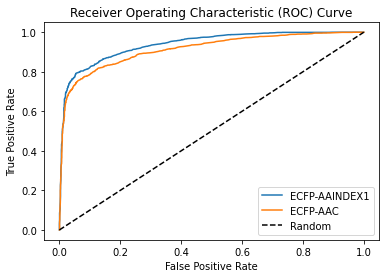

In [26]:
# Plot the ROC curve
plt.plot(fpr1, tpr1, label='ECFP-AAINDEX1')
plt.plot(fpr2, tpr2, label='ECFP-AAC')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()